<a href="https://colab.research.google.com/github/MeenalMSharma/Pneumonia-Detection-Model/blob/main/Pneumonia_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Importing Libraries

In [10]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install streamlit
!pip install tensorflow
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

## Importing Dataset

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: msharma
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:24<00:00, 100MB/s] 


## Read the image Dataset

In [ ]:
import opendatasets as od
import pandas
import os

od.download(
	"https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

# Update the path to the downloaded dataset directory
path = '/content/chest-xray-pneumonia'  # This is the typical download location

classes = os.listdir(path)
print(classes)

Skipping, found downloaded files in "./chest-xray-pneumonia" (use force=True to force download)
['chest_xray']


In [ ]:
# Define the directories for the X-ray images
# Assuming the dataset structure is:
# /content/chest-xray-pneumonia/chest_xray/train/NORMAL
# /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA
# ... similar structure for test and val folders

# Update the path to include the 'chest_xray' subdirectory
base_path = os.path.join(path, classes[0])

PNEUMONIA_dir = os.path.join(base_path, 'train', 'PNEUMONIA') # Adjust 'train' if needed
NORMAL_dir = os.path.join(base_path, 'train', 'NORMAL')     # Adjust 'train' if needed

# Create lists of the file names in each directory
pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('There are ', len(pneumonia_names),
	'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')

There are  3875 images of pneumonia infected in training dataset
There are  1341 normal images in training dataset


## Plot the Pneumonia infected Chest X-ray images

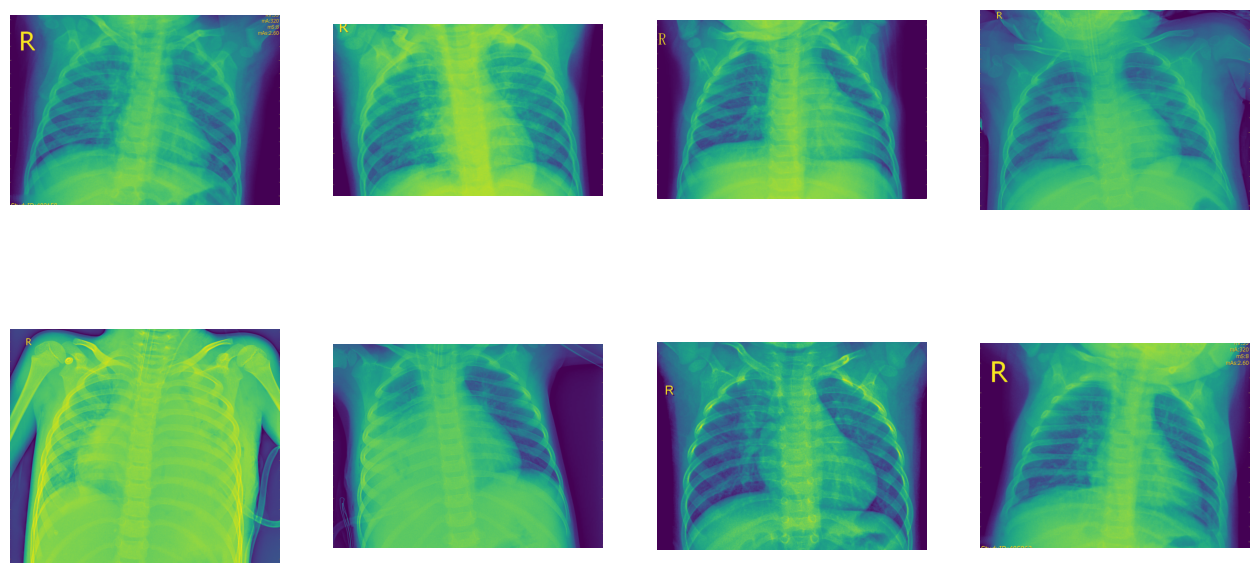

In [ ]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()

## Plot the Normal Chest X-ray images

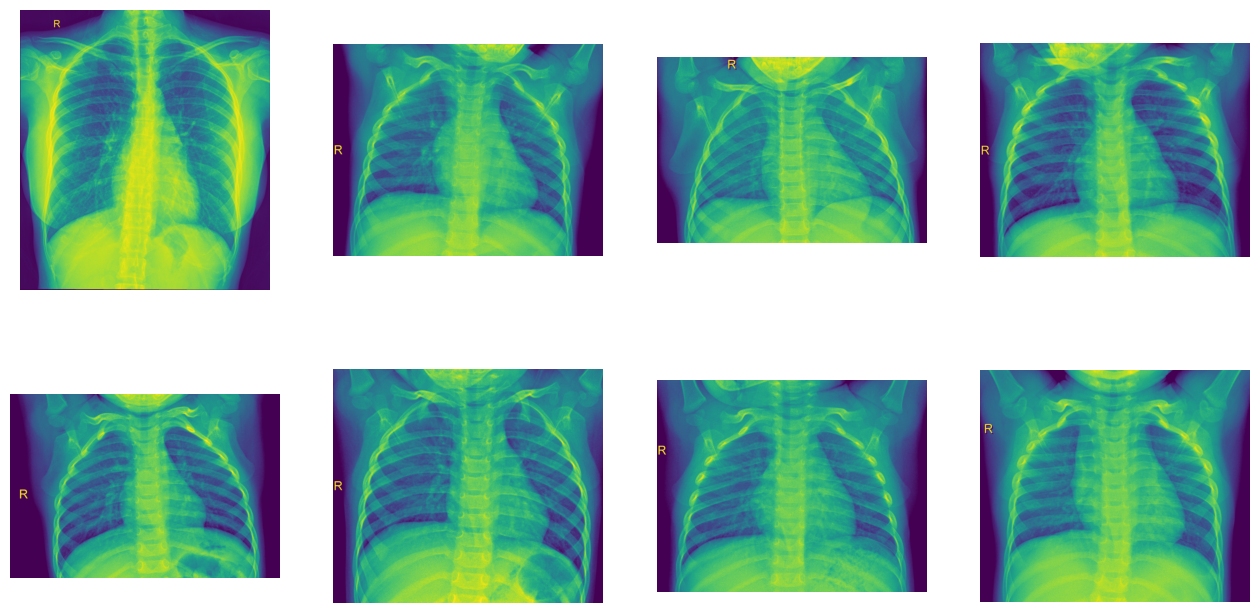

In [ ]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()

## Data Preparation for Training

In [ ]:
Train = keras.utils.image_dataset_from_directory(
	directory='/content/chest-xray-pneumonia/chest_xray/train', # Corrected path
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory='/content/chest-xray-pneumonia/chest_xray/test', # Corrected path
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory='/content/chest-xray-pneumonia/chest_xray/val', # Corrected path
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


## Model Architecture

In [2]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])

## Print the summary of the model architecture

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,0

 Total params: 7,313,474 (27.90 MB)

 Trainable params: 7,309,378 (27.88 MB)

 Non-trainable params: 4,096 (16.00 KB)

## Plot the model architecture

In [ ]:
!apt-get install graphviz -y # Install graphviz
!pip install pydot graphviz
#Import the necessary libraries
import pydot
import os
import graphviz

# Explicitly set the path to the dot executable
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'  # Update with the correct path if needed

# Instead of using the temporary file approach, try plotting directly to the output:
import matplotlib.pyplot as plt

# Attempt 1: Use plot_model with show_shapes=False to simplify
keras.utils.plot_model(model, show_shapes=False, show_layer_names=True, to_file='model.png')

# If Attempt 1 fails, try Attempt 2: Use pydot and StringIO to create the image data
from io import StringIO
dot_img_file = 'model_1.png'
try:
    dot = model_to_dot(model, show_shapes=False, show_layer_names=True)
    png = dot.create_png()
    with open(dot_img_file, 'wb') as f:
        f.write(png)
except Exception as e:
    print("Error during plotting:", e)

# Display the plot using IPython.display.Image
from IPython.display import Image
Image(filename='model_1.png')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
"dot" with args ['-Tpng', '/tmp/tmp3z0trl2w/tmpldh357mq'] returned code: -6

stdout, stderr:
 b''
b"newtrap: Trapezoid-table overflow 441\ndot: trapezoid.c:84: newtrap: Assertion `0' failed.\n"



AssertionError: "dot" with args ['-Tpng', '/tmp/tmp3z0trl2w/tmpldh357mq'] returned code: -6

## Compile the Model

In [ ]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)

## Train the model

In [ ]:
history = model.fit(Train,
		epochs=10,
		validation_data=Validation)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.8832 - loss: 0.3191 - val_accuracy: 0.5000 - val_loss: 2.2424
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 675s 4s/step - accuracy: 0.9463 - loss: 0.1697 - val_accuracy: 0.5625 - val_loss: 1.3009
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.9612 - loss: 0.1206 - val_accuracy: 0.5000 - val_loss: 6.1613
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 680s 4s/step - accuracy: 0.9617 - loss: 0.1112 - val_accuracy: 0.5000 - val_loss: 4.4591
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 673s 4s/step - accuracy: 0.9711 - loss: 0.0945 - val_accuracy: 0.6875 - val_loss: 1.4555
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 670s 4s/step - accuracy: 0.9651 - loss: 0.1103 - val_accuracy: 0.5625 - val_loss: 5.2552
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 690s 4s/step - accuracy: 0.9510 - loss: 0.1325 - val_accuracy: 0.7500 - val_loss: 1.4622
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.9572 - loss: 0.1235 - val_accu

## Model Evaluation

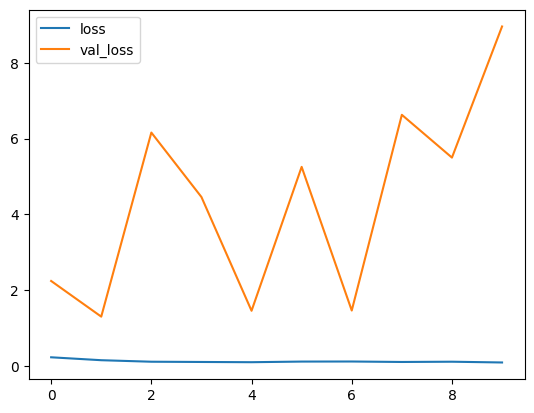

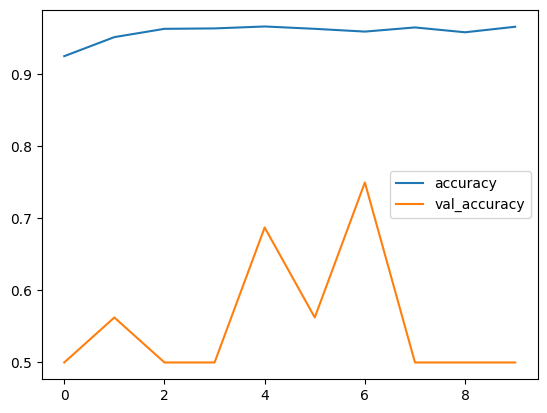

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

## Finding accuracy on Test Datasets

In [ ]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6510 - loss: 6.7573
The accuracy of the model on test dataset is 62.0


## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Pneumonia


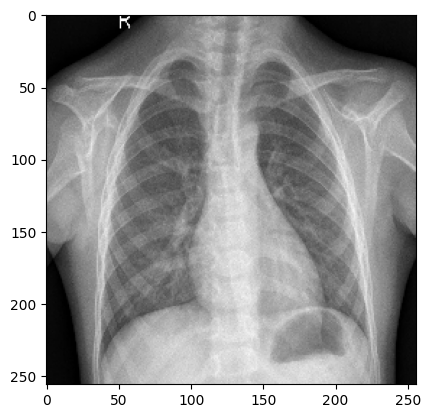

In [ ]:
# Load the image from the directory
# Assuming the dataset structure is:
# /content/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"/content/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg", # Corrected path
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
else:
    print("Pneumonia")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Pneumonia


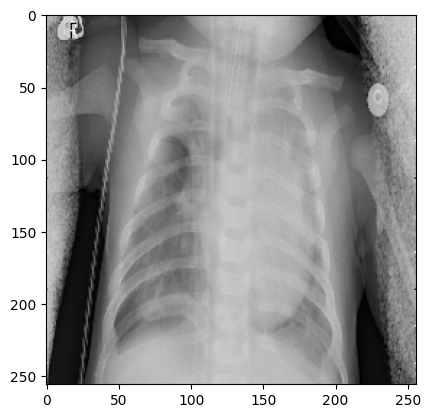

In [ ]:
# Load the image from the directory
# Assuming the dataset structure is:
# /content/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"/content/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg", # Corrected path
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array
# and expand its dimensions to match the
# expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input
# image belonging to each class from
# the prediction result
class_probabilities = result[0]

# Determine the class with the highest
# probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")

## Save model weights

In [15]:
# Save model in the new format
model.save('pneumonia_model.keras')  # Using the new Keras SavedModel format

## Download the Weights File

In [16]:
from google.colab import files
files.download('pneumonia_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!pip freeze > requirements.txt


In [13]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>